In [5]:
from IPython.display import Image
from IPython.display import HTML
%matplotlib inline

# Tutorial: Boston Airbnb Listings
## 1. Data Inspection
### 1.1 Data dimension - how many records?
As planners work with increasingly growing variety and volume of data, it is critical to know the typology and dimension of your dataset before any calculation, manipulation, or analysis. Generally, the datasets you work in Excel are structured as [__tabular data__](https://en.wikipedia.org/wiki/Table_(information)) in columns and rows. Thus, the Dimension of the dataset equals $N_{columns} \times N_{rows}$.

Excel Terminology:
- File
- Sheet
- Column
- Row
- Ribbon

Let's open the file "airbnb_units.xlsx". In Excel you can simply select the columns (usually the first row) or the index (usually the first column) to inspect the dimension of the dataset. Select row 1 to check the total number of the columns:

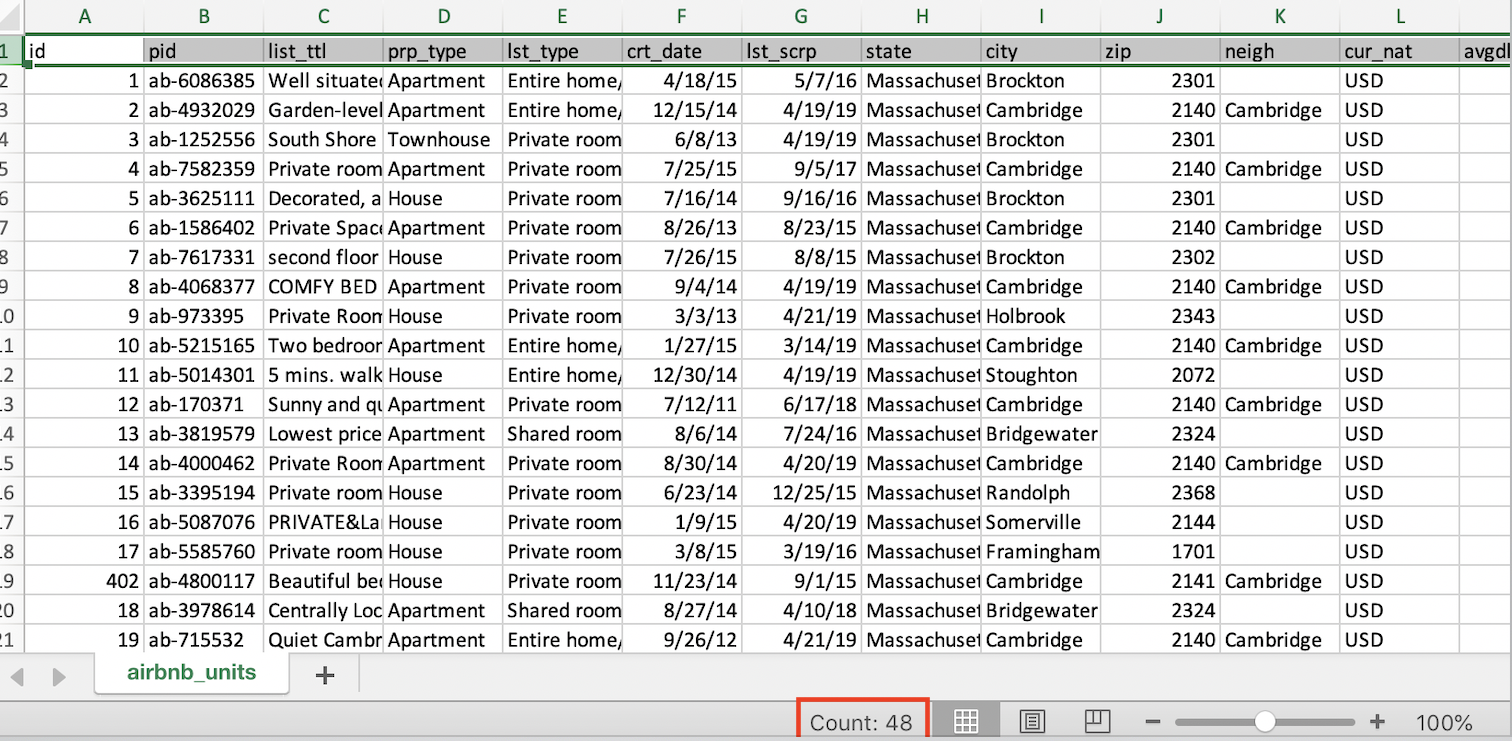

In [6]:
Image(filename='img/img_01.png',width=700, height=400)

Now we know that there are $N_{columns}=48$. 

How about the rows? Select the __column A__ (the first column) to see how many rows in total.

Then select __Column K__ to see if the count of rows keeps the same number. Why does Excel return a different number of rows for Column K?

<font color='blue'> Hot Keys:
    
- CTRL+End will take you to the bottom row/far-right column.
- CTRL+Home will take you to the top/left of the first column.
</font>

### 1.2 Metadata - what information?
[Metadata](https://en.wikipedia.org/wiki/Metadata) means "data about data". It provides a high-level summary of one or a series of datasets, such as the author, means of the data generation, purpose of the data, data format, file size, data quality, and other necessary guidance/explanations for the users. In particular, structural metadata describes the structure of a dataset or databased such as tables, columns, keys, and indexes. 

Now open the Excel file "metadata.xlsx". Is this a comprehensive metadata for "airbnb_units.xlsx"? What is the possible reason for this discrepancy (hint:  dataset exported from another software)? 

After checking with your colleague who processed this data, you now confirm the following column names and their meaning:

- crt_date: The date the vacation rental listing was created.
- pid: Property id.
- rp_type: Types of accommodations.
- vgdly_u: Average daily rate in USD.
- annrev_u: Annual revenue in USD.
- occ_rate: Occupancy rate. 
    - Occupancy Rate = Total Booked Days / (Total Booked Days + Total Available Days). 
    - The calculation only includes vacation rentals with at least one Booked Night.
    
- bed: Number of bedrooms.
- max_gs: The maximum number of guests the vacation rental property can accommodate.
- canc_pol: Cancellation policy for the vacation rental listing.


### 1.3 Basic descriptive statistics
Using functions __AVG( )__, __MAX( )__, and __MIN( )__ to calculate some simple descriptive statistics:
- The maximum, minimum, and average daily rate: is the minimum rate realistic?
- The latest listing, and how many days it is from the first listing: Do you have some trouble?

How to Use Excel’s Descriptive Statistics Tool: https://www.dummies.com/software/microsoft-office/excel/how-to-use-excels-descriptive-statistics-tool/

Load the Analysis ToolPak in Excel:
https://support.office.com/en-us/article/load-the-analysis-toolpak-in-excel-6a63e598-cd6d-42e3-9317-6b40ba1a66b4

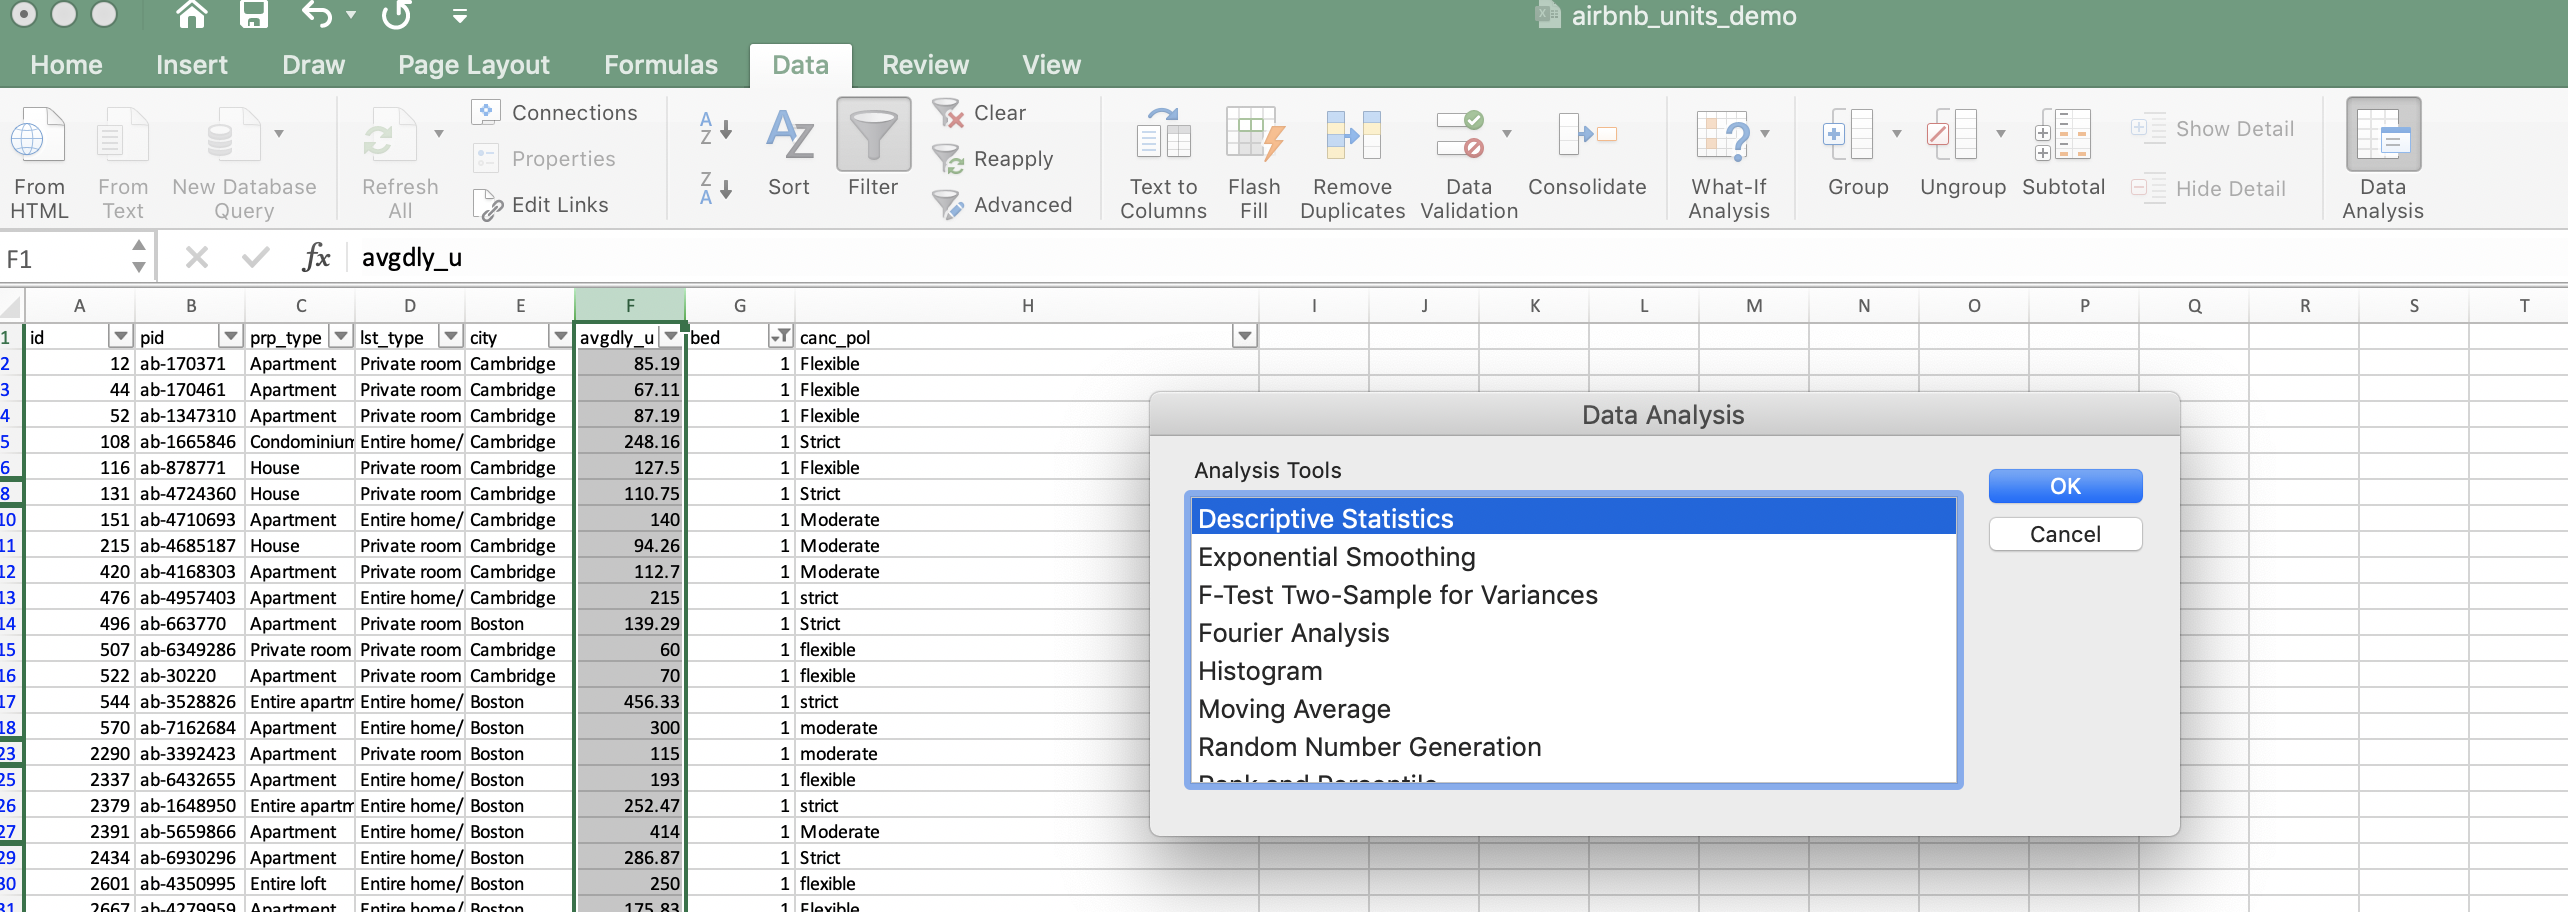

In [8]:
Image(filename='img/summary_tool_01.png',width=1200, height=500)

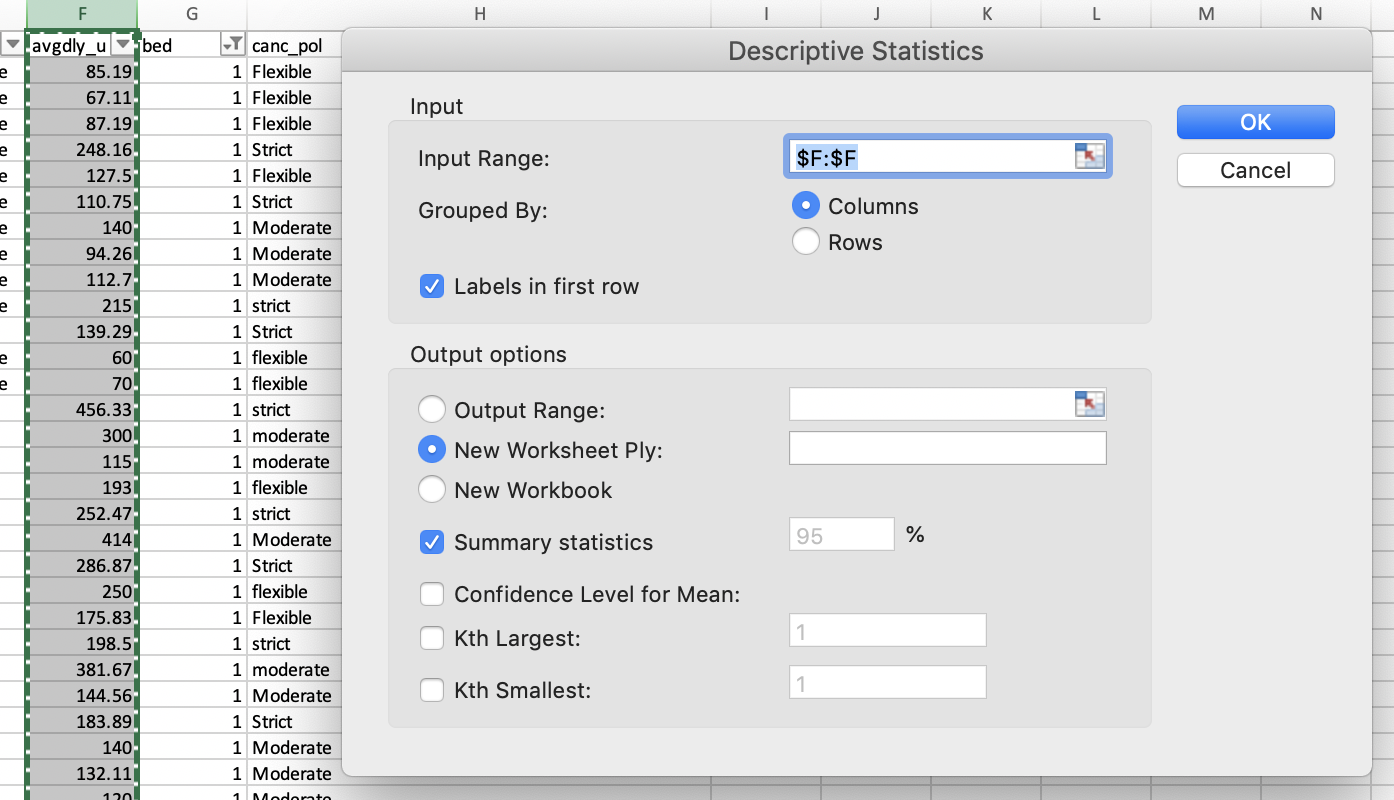

In [11]:
Image(filename='img/summary_tool_02.png',width=1000, height=400)

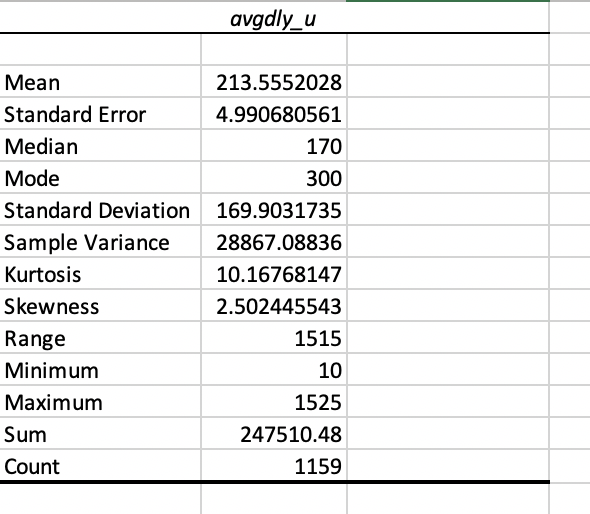

In [15]:
Image(filename='img/summary_tool_03.png',width=400, height=300)

## 2. Data Wrangling

### 2.1 Variable type and cell formating
In Excel Tutorial worksheet part 5 (TEXT AND NUMERIC DATA), we learn that value in Excel can be stored as different types with related calculation. 

Now looking at __column F__ (crt_date: The date the vacation rental listing was created): what format it should be? Does the calculation work after changing the proper cell format?

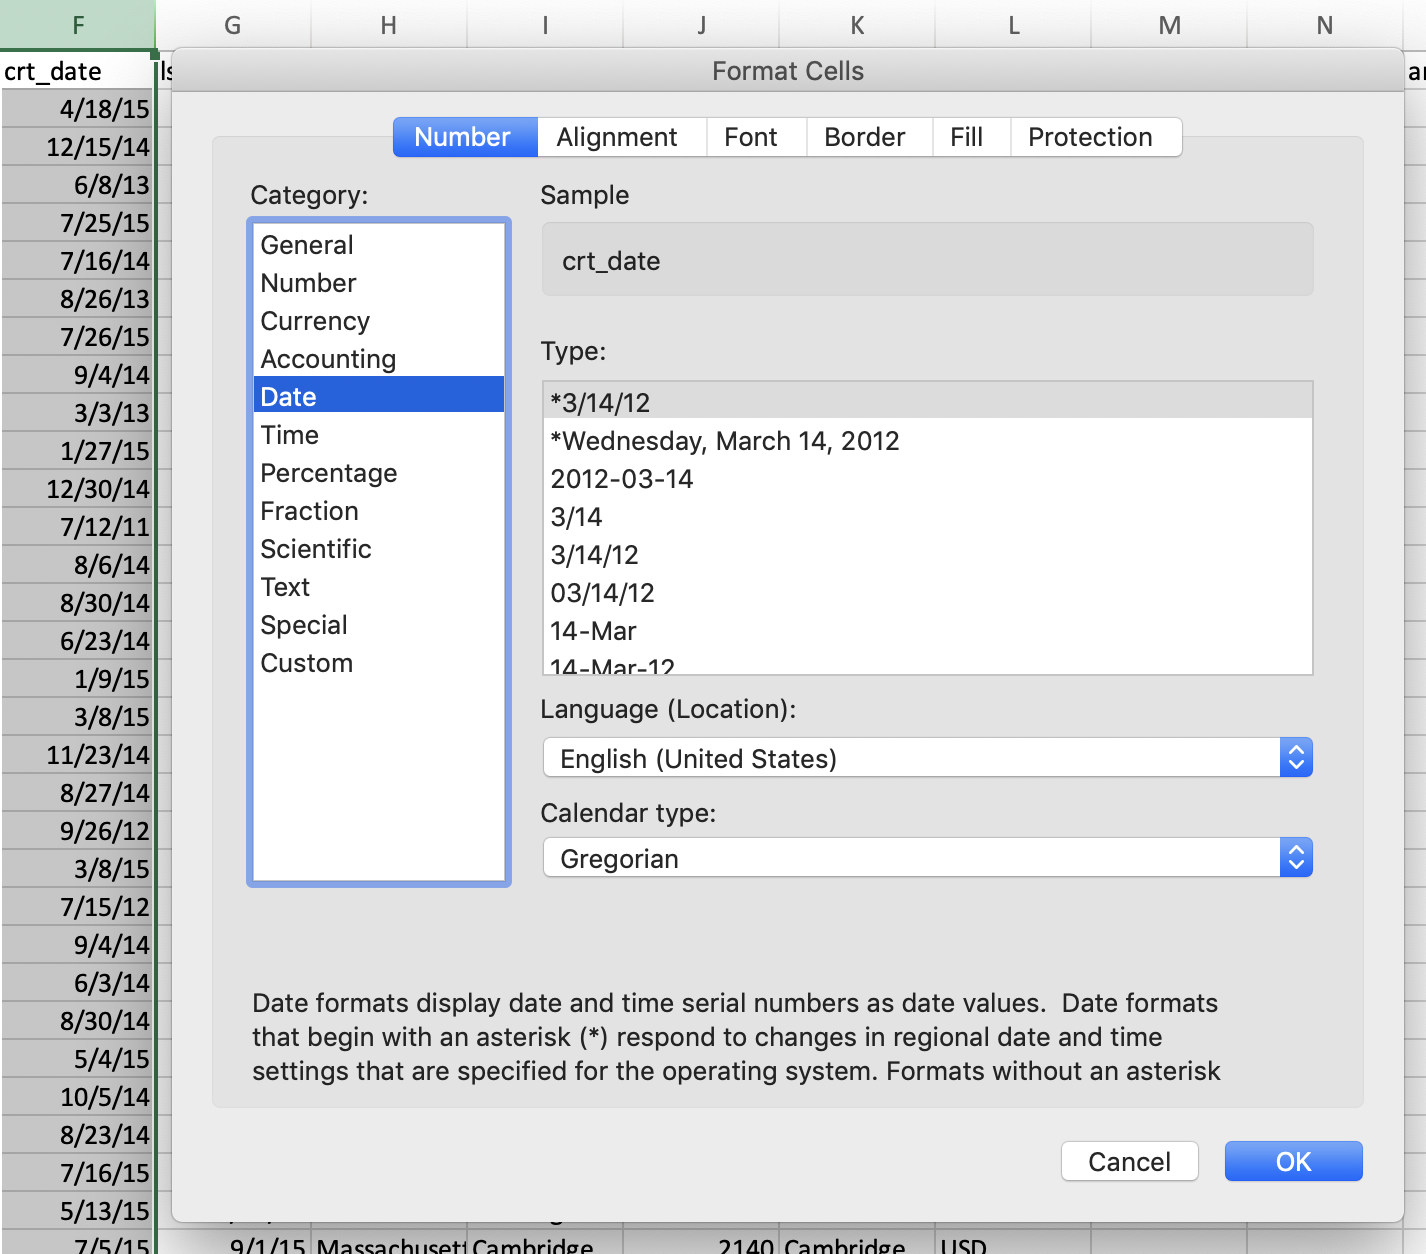

In [30]:
Image(filename='img/img_02.png',width=500, height=500)

### 2.2 Sort & Filter
Sort & Filter tool enables you to:

- Sort rows by a column, ascending or descending;
- Create a subset of data based on one or multiple variables.

Creat a filter for each column: select all columns --> Sort & Filter --> Filter.    

Any difference in your columns? Now use the filter of the "city" column to create a subset of listings in Cambridge.  

How many listing records in Cambridge? (Look at the row number, aka. index, on your sheet, is this a "subset" of raw data?) 

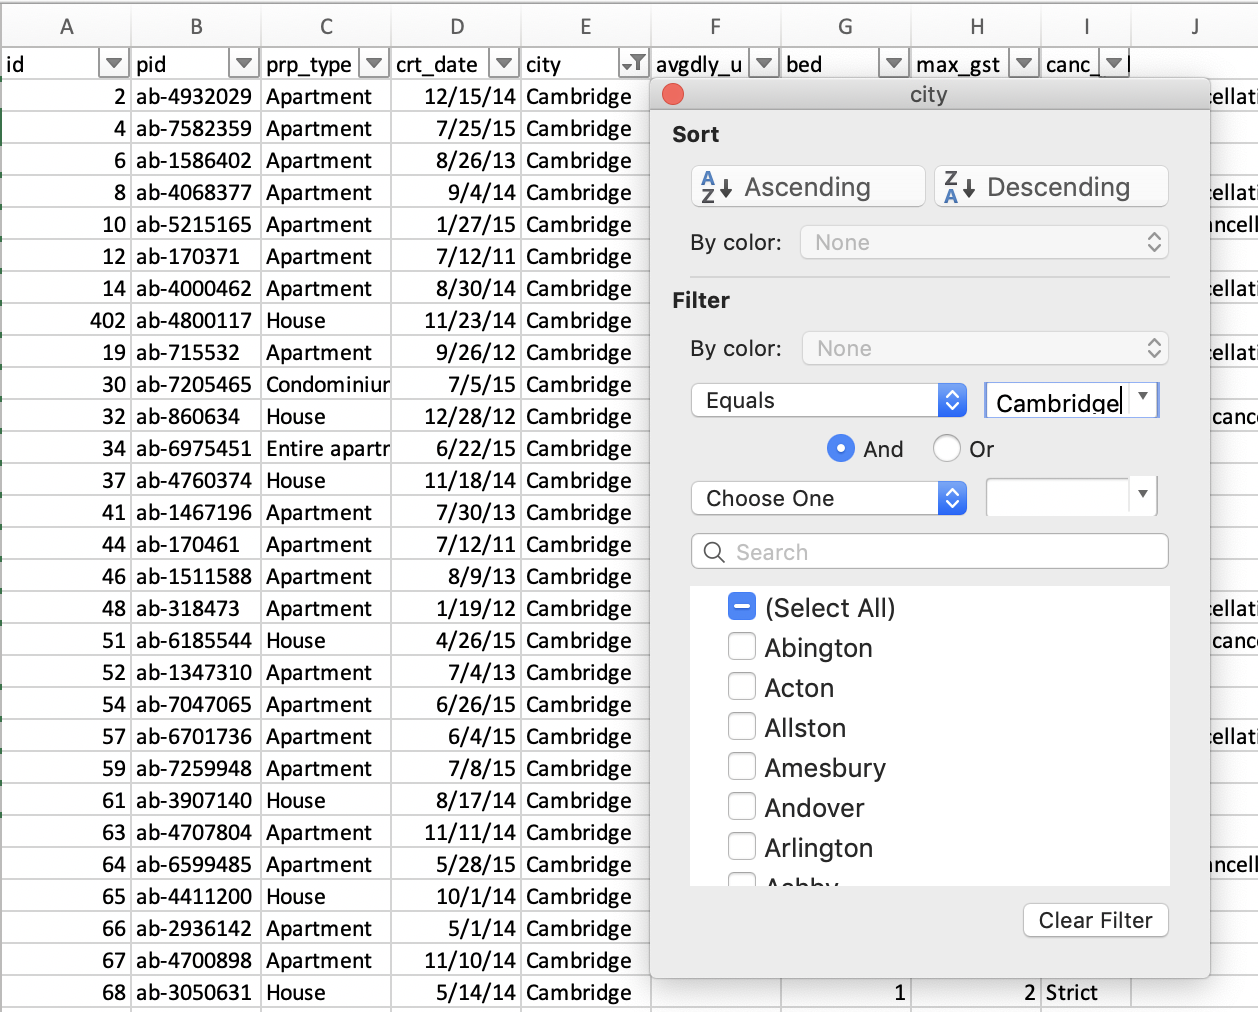

In [32]:
Image(filename='img/img_03.png',width=500, height=500)

Let's create a new sheet, name it as "Cambridge+Boston". Then copy and paste the following columns from "airbnb_units" sheet with certain conditions: 

- id
- pid
- prp_type
- lst_type
- city (Boston __or__ Cambridge)
- avgdly_u (listing price is greater than zero)
- bed
- canc_pol (Flexible, Moderate, or Strict)

Now check at the row number (a.k.a. index) on your sheet again, is this now a subset of raw data?


<font color='blue'> IMPORTANT:  Save your working file before moving to the next session. </font> 

### 2.3 Pivot Table

You can use a [Pivot Table](https://en.wikipedia.org/wiki/Pivot_table) to calculate, summarize, and analyze data to compare by groups and explore patterns.

Let's recreate a pivot table on a new sheet named as "Pivot_Table".					
								
• Go to Insert--> Pivot Table								
• Select all on "Cambridge" sheet.							
• Choose to place the PivotTable in a new worksheet.							

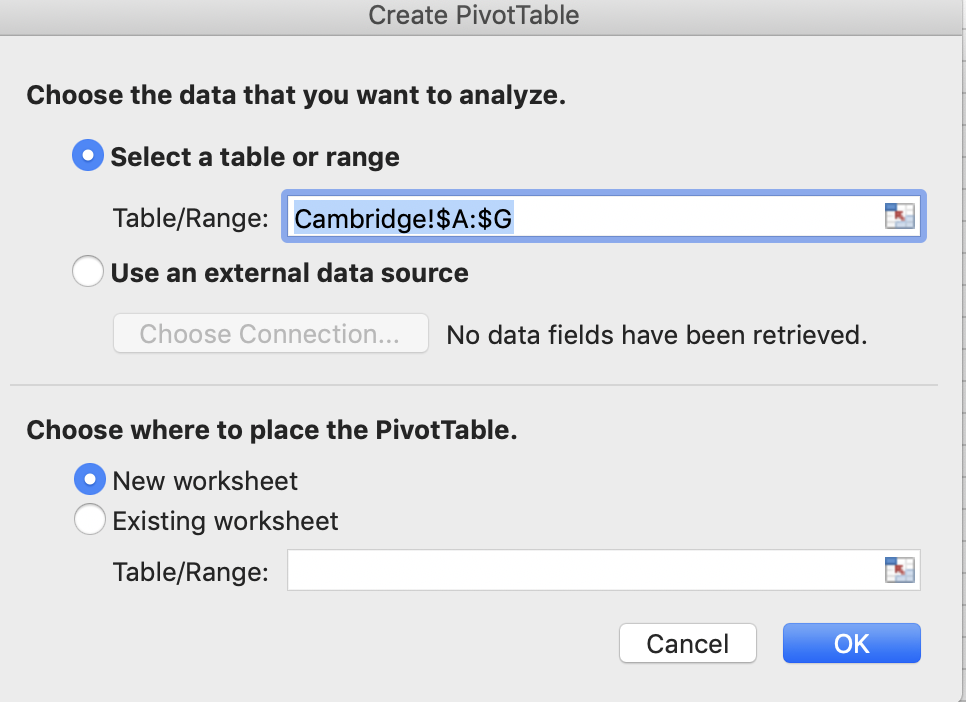

In [46]:
Image(filename='img/img_04.png',width=350, height=400)

Now click the table area, you will see a __PivotTable Fields__ window. This is the interface for you to choose what to calculate/report on your pivot table.

In __FILED NAME__, let's select"avgdly_u", "bed", and "canc_pol". Pay attention to what changes in __Values__ and __Columns__ windows. 
- Drag "bed" to Columns;
- Drag "canc_pol" to Rows;

What appears on your sheet?

The newly generated column summarizes the sum of average daily rate by cities. This is not very informative. How can we change from the sum to the average price?

Click the small "i" icon next to the metrics calculated in __Values__ window. Change from Sum to Average. You can also change the filed name. Let's call it "Average Rate ($/day)"

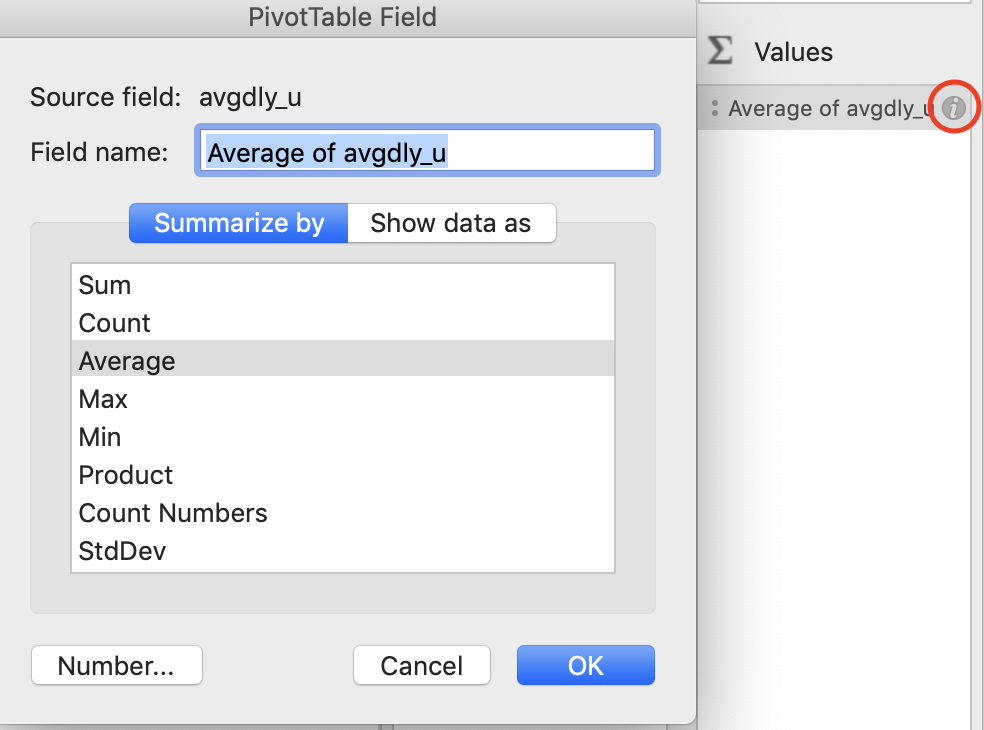

In [47]:
Image(filename='img/img_05.png',width=400, height=400)

Let's work together to answer these questions:                                
• What is the average daily rate in Cambridge?                                
• What is the average daily rate in Cambridge, grouped by the number of bedrooms?                
• What is the average daily rate in Cambridge, grouped by the number of bedrooms (bedroom <= 3) and cancellation policy? (You need to filter the pivot table)            

[Filter data in a PivotTable](https://support.office.com/en-us/article/filter-data-in-a-pivottable-cc1ed287-3a97-4e95-b377-ddfafe79fa8f)

- Click anywhere in the PivotTable to show __PivotTable Analyze__ on the ribbon --> Insert Slicer.                                
- In the Insert Slicers dialog box, check the boxes of the fields you want to create slicers for --> Click OK.
-  A slicer appears for each field you checked in the Insert Slicers dialog box.

In __PivotTable Fields__ window, drag "id" (property id) to __Values__. What new information do you have on the pivot table now? 

Looking at the count of properties grouped by the number of bedrooms and cancellation policies, is it necessary to include all information in your final summary table?

Now let's compare the price difference between "Flexible" and "Strict" policy. How can you do this? (HINT: filter)

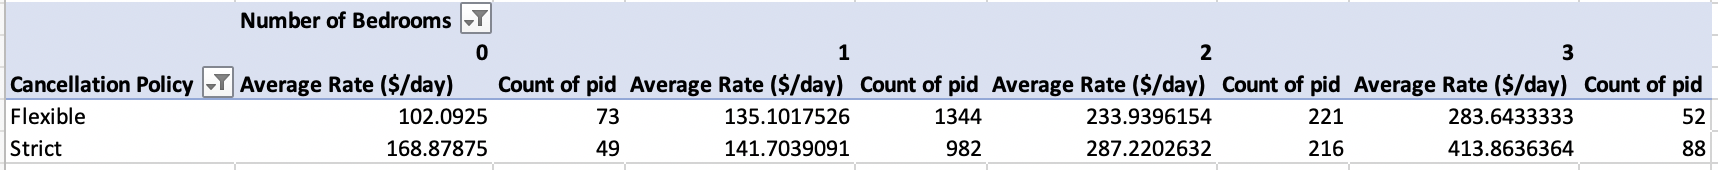

In [50]:
Image(filename='img/img_06.png',width=800, height=500)

The type of property could be another factor related to the listing price. In __PivotTable Fields__, drag "prp_type" from FIELD NAME to Values. Then do the same for Rows. Now we have a table summarizes the price grouped by 1) property types, 2) cancellation policy, and 3) the number of bedrooms. Now we know that the majority of listings are in "Apartment" building category.

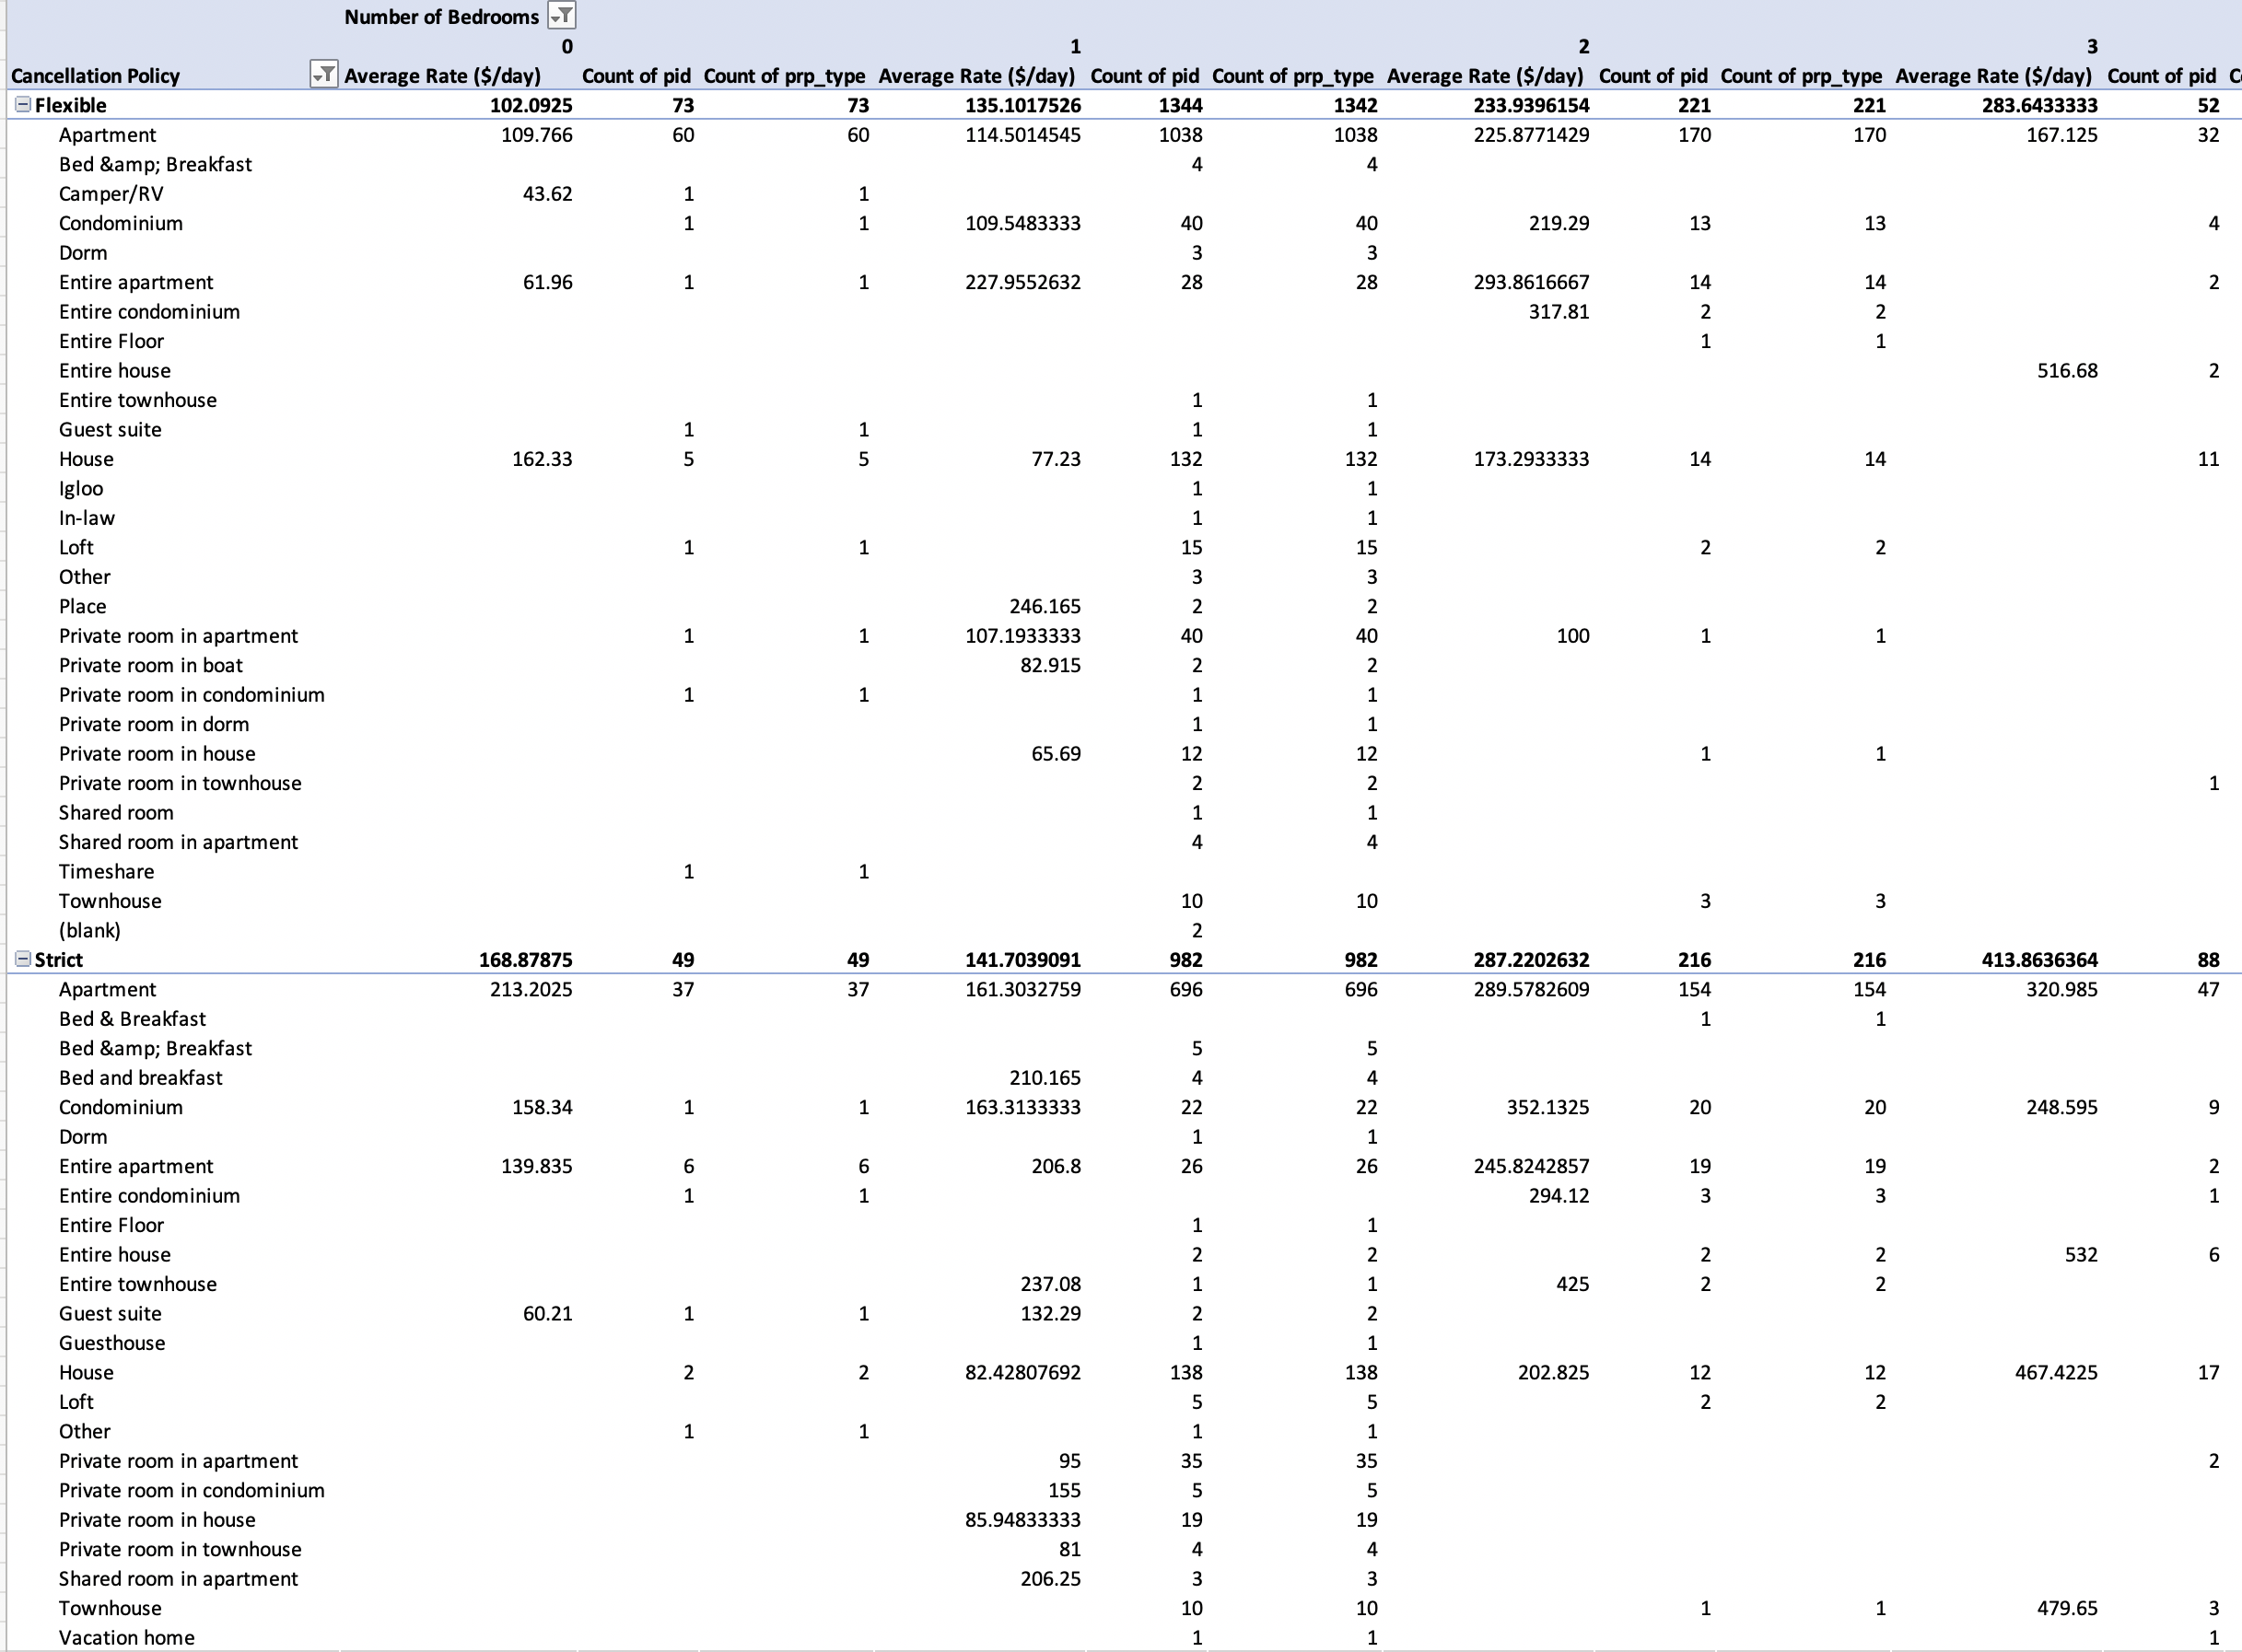

In [51]:
Image(filename='img/img_07.png',width=800, height=500)

Considering the most of listings are in Apartment property type, we want only to compare the listings within this category.  

Now in __PivotTable Fields__, drag "prp_type" from Rows to Filters. Any change in your table?

In the newly generated prp_type filter, select "Apartment". You can also create another filter for "city".

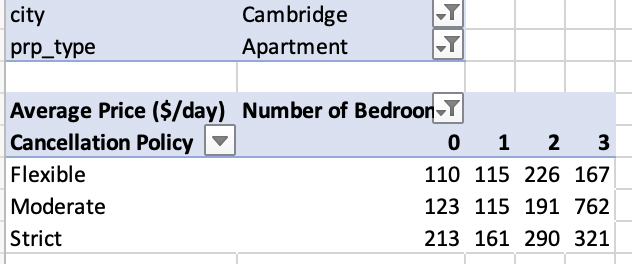

In [69]:
Image(filename='img/img_08.png',width=400, height=200)

## 3. Figure plotting

### 3.1 Bar Plot
Now we want to visualize the price comparison of all listings in apartment buildings grouped by 1) Number of Bedrooms, and 2) Cancellation Policy. In __PivotTable Fields__, we can remove the count of pid in Values (right-click pid --> Remove Field). 

- Excel ribbon --> Insert --> Column
- Right click on the empty figure --> Select Data --> select the whole table (Is the default figure an effective data visualization?)
- Right click on the figure --> Select Data --> Switch Row/Column (Is this a better visualization for price comparison?)
- Click figure --> Design --> Quick Layout (Layout 7) --> Double click axis title to give proper names for X axis and Y axis. 

- __Add Figure Title__: Click figure --> Design --> Add Chart Element --> Chart Title --> Double click title and rename it (e.g., "Airbnb Listing Price Comparison - Apartment")

- __Add Data Labels__: Click figure --> Design --> Add Chart Element --> Data Labels (How to round the numbers in your labels?)


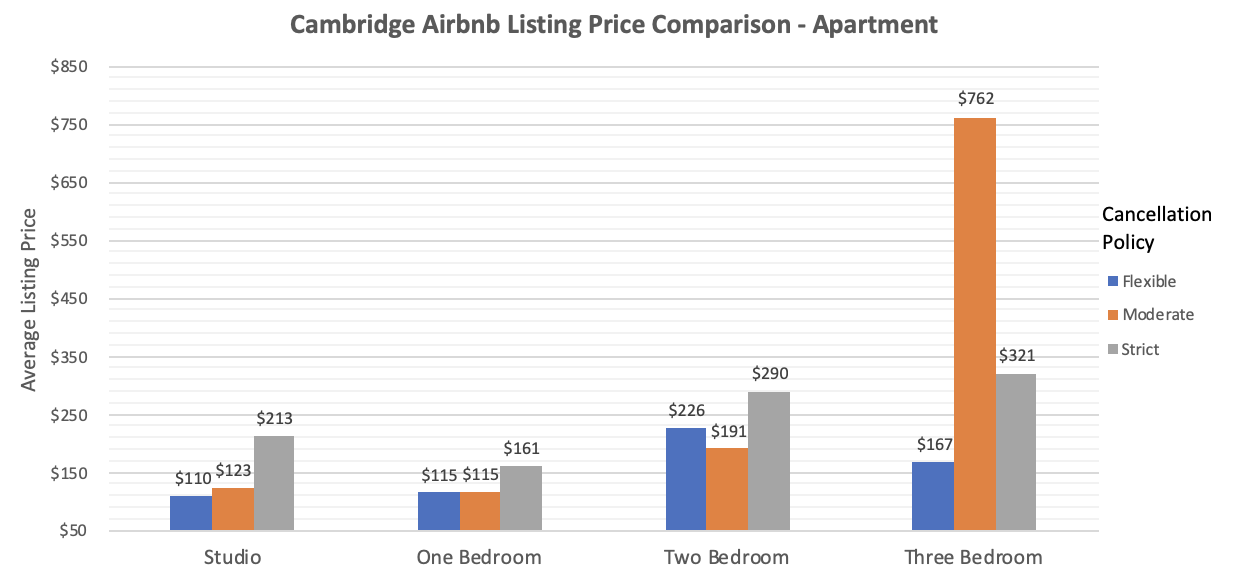

In [70]:
Image(filename='img/img_09.png',width=600, height=400)

Very easily, we can create another figure for Boston by changing the filter in Pivot Table.

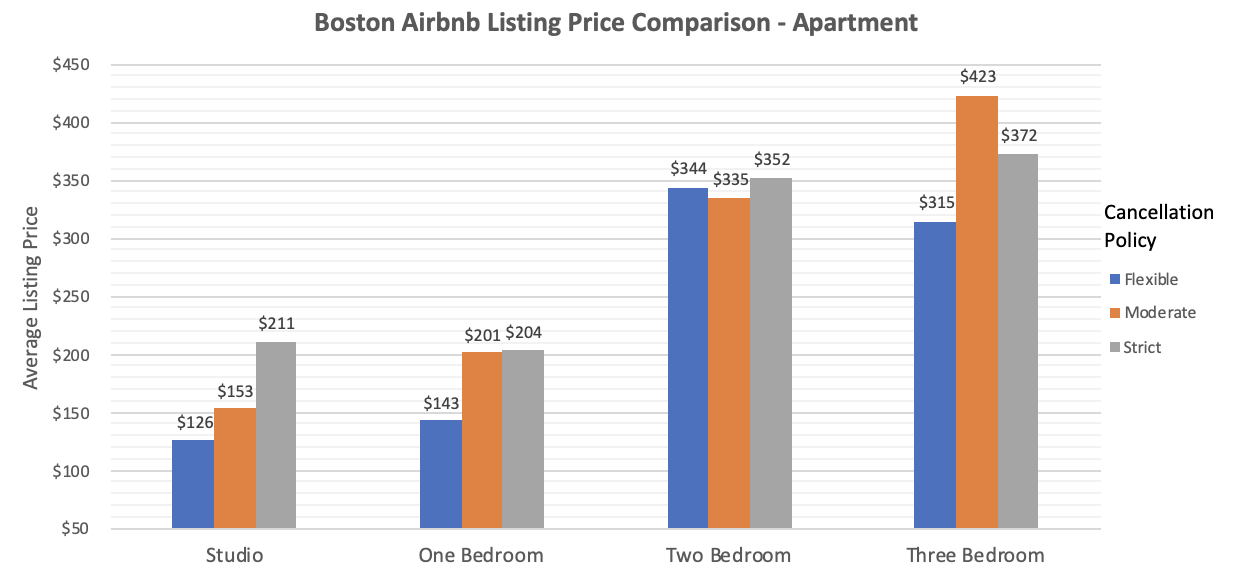

In [71]:
Image(filename='img/img_10.png',width=600, height=400)

Using the same way, we can quickly generate another figure to visualize the number of listings:

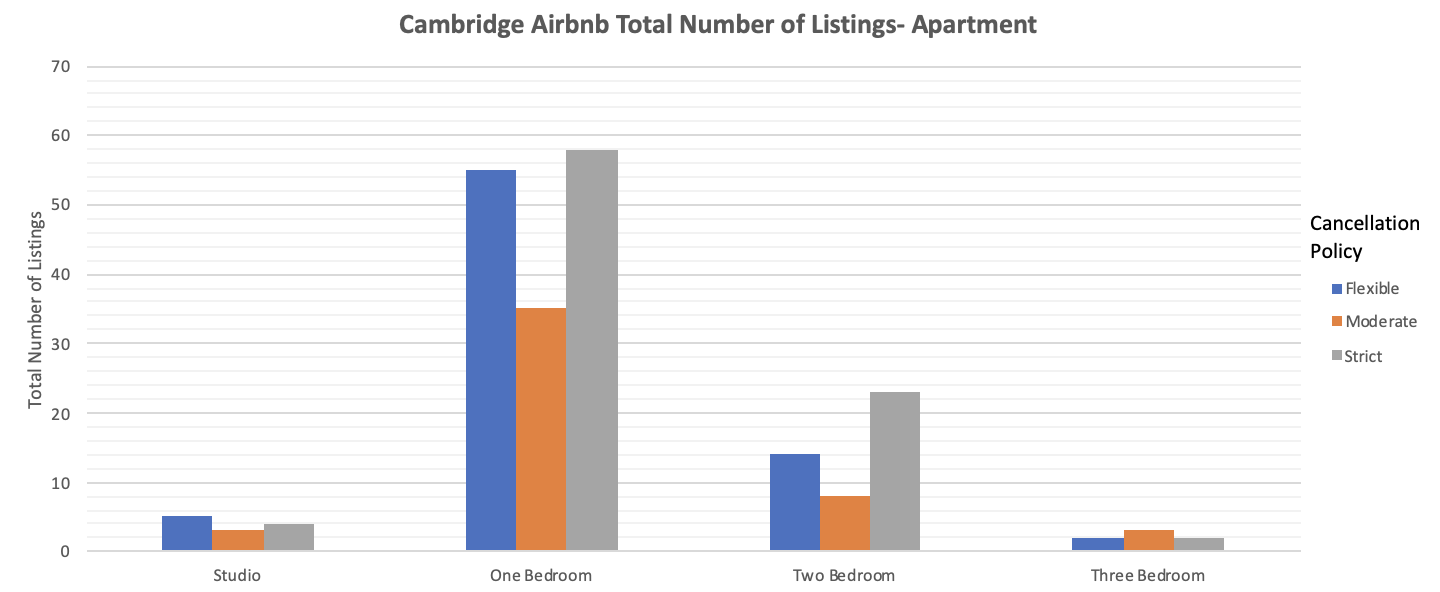

In [73]:
Image(filename='img/img_11.png',width=600, height=400)

__Additional Question__: 

Is there a price difference based on the cancellation policy?  
Suppose we control the number of bedroom as 2 and property types as apartment building, how can we measure the price difference based on cancellation policy with statistical persuasion?

HINT: [T.TEST function](https://support.office.com/en-us/article/t-test-function-d4e08ec3-c545-485f-962e-276f7cbed055)

<font color='blue'> IMPORTANT:  Save your working file before moving to the next session. </font> 

### 3.2 Box Plot
Is average the only measure for the listing price? What are typical concerns when using mean as the metric?

We decide to [measure the spread](https://en.wikipedia.org/wiki/Statistical_dispersion) of the price for one-bedroom apartment listings between Boston and Cambridge. Can you quickly create a subset by using filtering?

- Create a new sheet with all one-bedroom listings in Boston and Cambridge. 
- Insert --> Statistical --> Box and Whisker  --> Select data
- Select the columns in order of: avgly_u --> city
- How to read a Box Plot? Any concerns regarding the figure below?

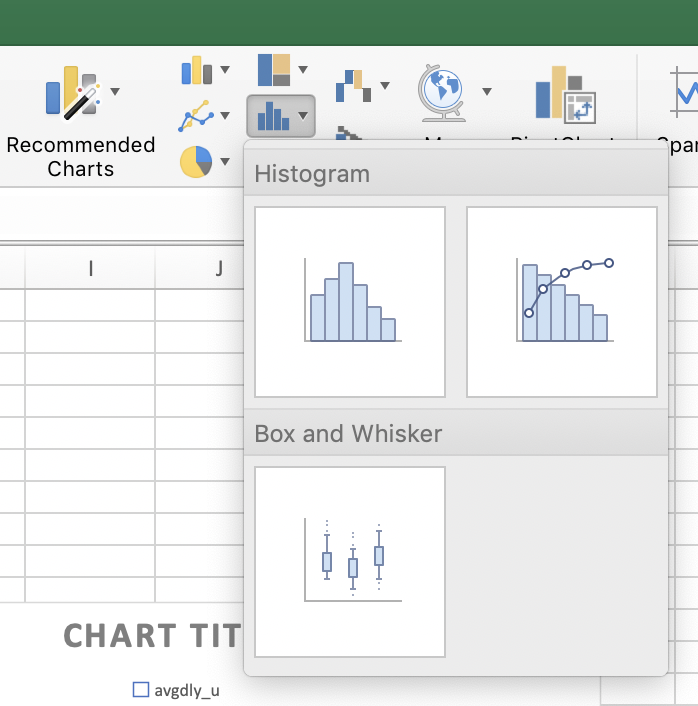

In [82]:
Image(filename='img/img_16.png',width=300, height=200)

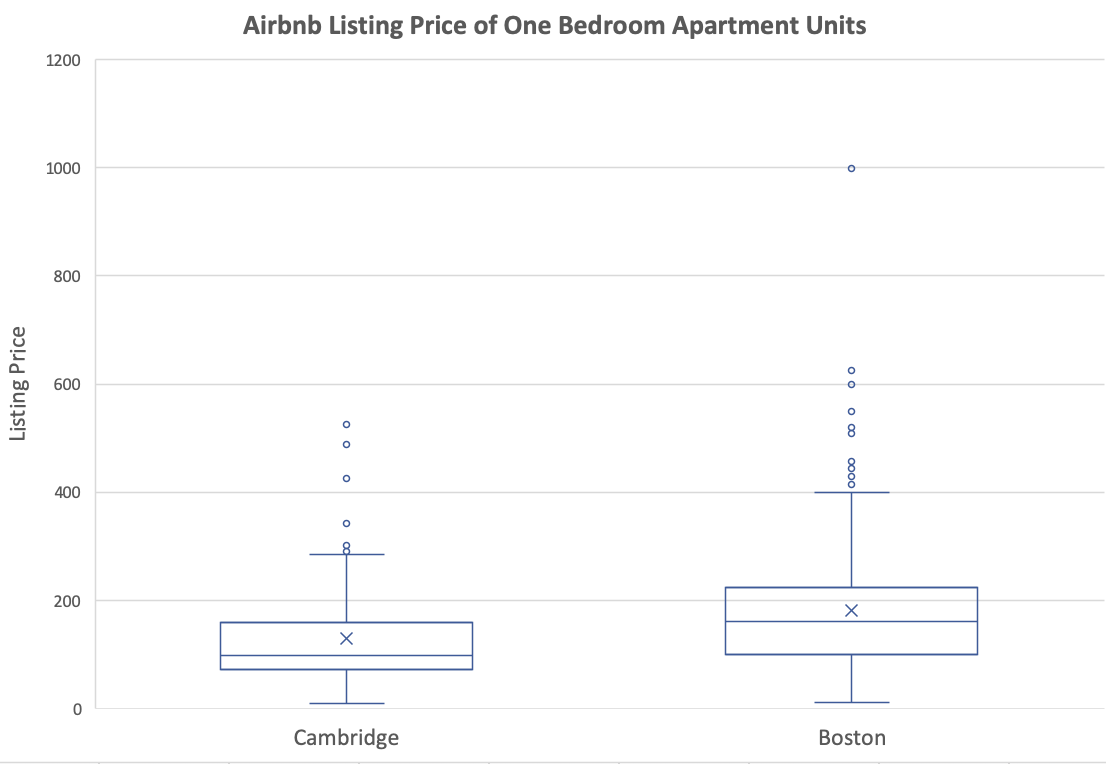

In [74]:
Image(filename='img/img_12.png',width=600, height=400)

### 3.3 Statistical summary with conditions:



This must be confirmed with control+shift+enter, not just with enter.

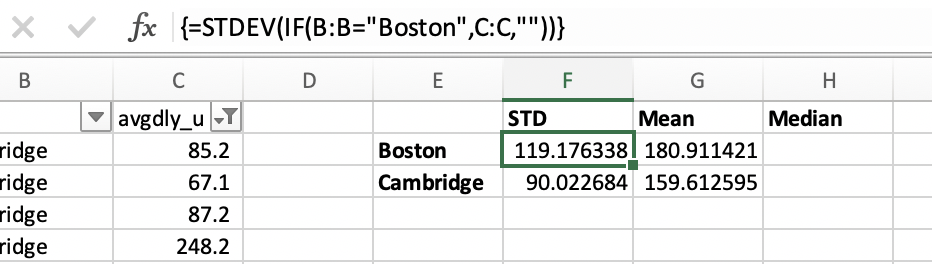

In [75]:
Image(filename='img/img_13.png',width=600, height=400)

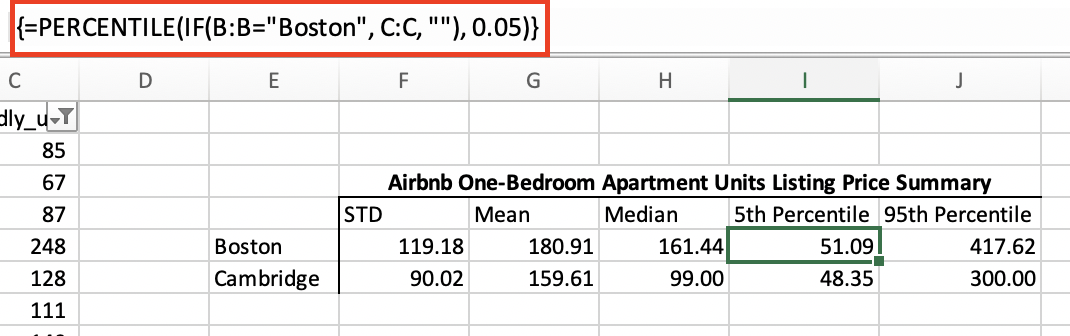

In [76]:
Image(filename='img/img_14.png',width=600, height=400)

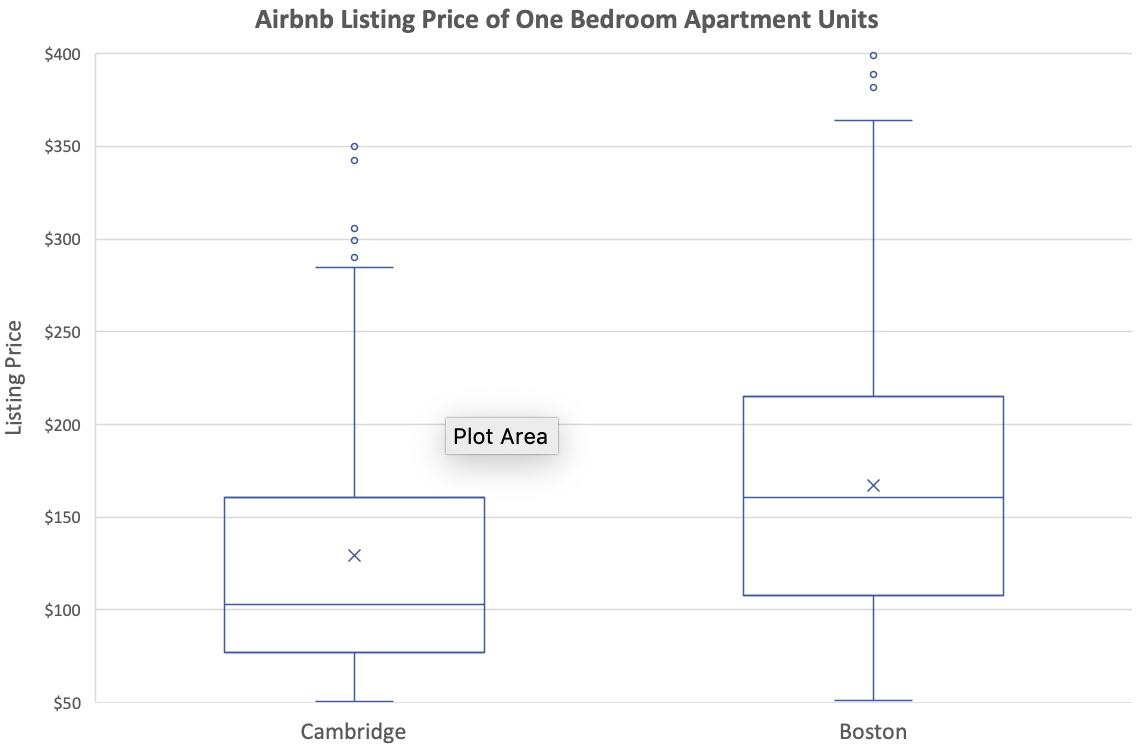

In [78]:
Image(filename='img/img_15.png',width=600, height=400)

Adjust the dimension (width and height) of your figure, how does the proportion of the figure have an impact on readers' perception? And of course, you can spend another 30 minutes to make your figure look nicer. 

Keep in mind that we are not decorating the figure. You may want to learn about [Edward Tufte's Data-Ink Ratio](https://infovis-wiki.net/wiki/Data-Ink_Ratio).


## 4. Final Takeaways

In this workshop, we go through the following key components of Excel:
   - Data inspection and statistical summary
   - Basic data manipulation using Pivot Tables and condition
   - Basic data plotting and figure generation
   
If time allows, we will briefly discuss the workflow among Excel and other software/programming languages:

- Python --> Excel --> Tableau
- Excel --> Python (pandas)
- ArcGIS/ QGIS --> Excel 
- Excel --> R

## 5. Additional Resources

Microsoft Excel Help Center: https://support.office.com/en-us/excel

Handbook: [Excel Statistics: A Quick Guide by Neil J. Salkind. SAGE.](https://us.sagepub.com/en-us/nam/excel-statistics/book244348)

Master Excel for Data Science on Lynda.com: https://www.lynda.com/learning-paths/IT/master-excel-for-data-science

Learn how to use Excel with real-world examples (edX mini online course): https://www.edx.org/xseries/microsoft-excel-data-analyst

Bringing AI to Excel—4 new features announced today at Ignite: https://www.microsoft.com/en-us/microsoft-365/blog/2018/09/24/bringing-ai-to-excel-4-new-features-announced-today-at-ignite/